In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
%matplotlib inline
import os

In [0]:
data=datasets.fashion_mnist.load_data()
X_train,y_train,X_test,y_test=data[0][0],data[0][1],data[1][0],data[1][1]

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
print("training data shape {}".format(X_train.shape))
print("testing data shape {}".format(X_test.shape))

training data shape (60000, 28, 28)
testing data shape (10000, 28, 28)


In [0]:
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}
#normalising between 0 and 1
X_train,X_test=X_train/255,X_test/255

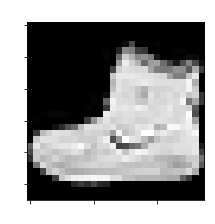

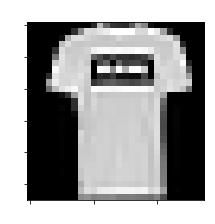

In [0]:
def imgshow(x,y):
  plt.figure(figsize=[7,7])
  plt.subplot(121)
  curr_img=np.reshape(x,(28,28))
  plt.imshow(curr_img,cmap="gray")
  plt.xticks(color="w")
  plt.yticks(color="w")
  plt.title(label_dict[y],color="w")
imgshow(X_train[0],y_train[0])
imgshow(X_train[1],y_train[1])

In [0]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)
print(X_train.shape)

(60000, 28, 28, 1)


In [0]:
layers=[
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation=tf.nn.relu,input_shape=X_train.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding="same",activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
    
    tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)
    
]
model=tf.keras.Sequential(layers)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flat

In [0]:

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.fit(X_train,y_train,epochs=10)
model.save_weights("model.tf")

Epoch 1/10
60000/60000 [==============================] - 122s 2ms/sample - loss: 0.4295 - acc: 0.8445
Epoch 2/10
60000/60000 [==============================] - 120s 2ms/sample - loss: 0.2730 - acc: 0.8999
Epoch 3/10
60000/60000 [==============================] - 119s 2ms/sample - loss: 0.2252 - acc: 0.9179
Epoch 4/10
60000/60000 [==============================] - 120s 2ms/sample - loss: 0.1941 - acc: 0.9283
Epoch 5/10
60000/60000 [==============================] - 118s 2ms/sample - loss: 0.1704 - acc: 0.9373
Epoch 6/10
60000/60000 [==============================] - 118s 2ms/sample - loss: 0.1471 - acc: 0.9452
Epoch 7/10
60000/60000 [==============================] - 118s 2ms/sample - loss: 0.1279 - acc: 0.9514
Epoch 8/10
60000/60000 [==============================] - 118s 2ms/sample - loss: 0.1104 - acc: 0.9581
Epoch 9/10
60000/60000 [==============================] - 118s 2ms/sample - loss: 0.0948 - acc: 0.9644
Epoch 10/10
60000/60000 [==============================] - 118s 2ms/sampl

In [0]:
test_loss,test_acc=model.evaluate(X_test,y_test)

10000/10000 [==============================] - 5s 541us/sample - loss: 0.3072 - acc: 0.9145


In [0]:
predictions=model.predict_classes(X_test)

In [0]:
print("{} are correctly predicted out of 10000 images".format((predictions==y_test).sum()))

9145 are correctly predicted out of 10000 images


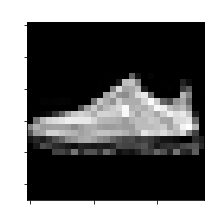

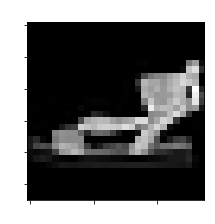

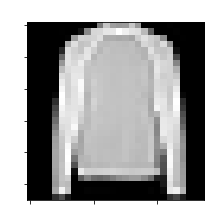

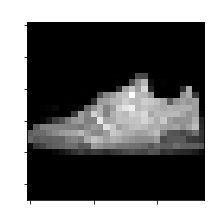

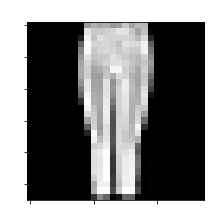

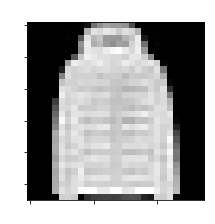

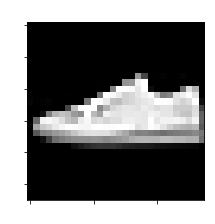

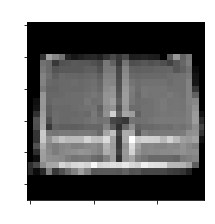

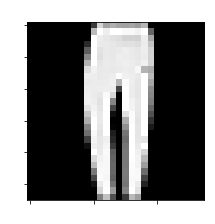

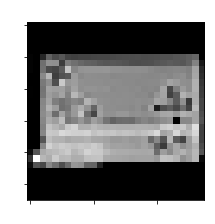

In [0]:
import random as rm
example=X_test.copy()
rm.shuffle(example)
it=rm.choice(range(0,900))
test_ex=example[it:it+10]
pred_ex=model.predict_classes(test_ex)
for x,y in zip(test_ex,pred_ex):
  imgshow(x,y)